# Question 1 c) - Fixed R_nought

In [2]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def deriv(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

def model_lockdown(r_nought, mu, N, I0, timeframe, beta_hard, beta_soft):
    # Calculate gamma based on given betas
    gamma_hard = (beta_hard - r_nought * mu) / r_nought
    gamma_soft = (beta_soft - r_nought * mu) / r_nought
    
    # Store gammas and betas in dictionary which is later used in for-loop
    dict_beta_gamma = {beta_hard: gamma_hard, beta_soft: gamma_soft}
    
    for key in dict_beta_gamma:
        # Population size
        N = N

        # Initial conditions: 1 Infected, no Recovered individuals, no dead individuals
        I0, R0, D0 = I0, 0, 0 #case zero

        # All others, S=N-I-R susceptible, initially S0=N-I0-R0-D0
        S0 = N - I0 - R0 - D0 #normalization
        print(S0, N, I0, R0, D0)

        # Initial conditions vector
        y0 = S0, I0, R0, D0

        # A grid of time points (in days)
        t = np.linspace(0, timeframe, timeframe)
        
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N, key, dict_beta_gamma[key], mu))
        S, I, R, D = ret.T # return vector

        #find R_effective = 1 time
        t_1 = 0
        for time in range(0,len(S)):
            if r_nought*S[time]/N < 1: 
                t_1 = time
                break
        print("R_eff=1 at t=", t_1, "d")

        # Calculate the fraction of the population which has died at t=365
        fraction_dead = D[-1]/N

        # Plot the data on three separate curves for S(t), I(t) and R(t)
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
        ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
        ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
        ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
        ax.plot(t, r_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
        ax.set_xlabel('Time / days')
        ax.set_ylabel('Fraction')
        ax.set_ylim(0,1.5)
        ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        ax.set_title(rf"r_nought: {round(r_nought, 2)}, $\mu$: {mu}, $\beta$: {round(key, 2)}, $\gamma$: {round(dict_beta_gamma[key], 2)}")
        plt.text(275, fraction_dead + 0.05, f"D(365): {round(fraction_dead, 3)}")
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.suptitle("The impact of a lockdown using a $beta$ of " +  str(key), fontsize = 15, y= 1.05)
        plt.show()

0.98 1 0.02 0 0
R_eff=1 at t= 68 d


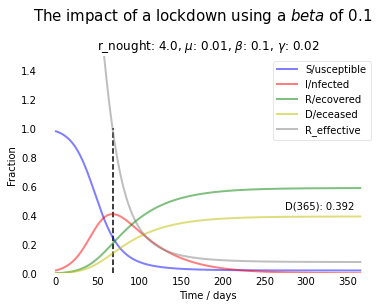

0.98 1 0.02 0 0
R_eff=1 at t= 9 d


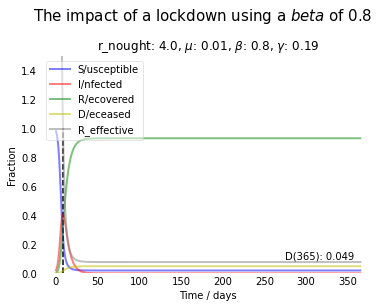

In [9]:
# Initialization
r_nought = 4.0
mu = 0.01
N = 1
I0 = N * 0.02
timeframe = 365
beta_hard = 0.1
beta_soft = 0.8

model_lockdown(r_nought, mu, N, I0, timeframe, beta_hard, beta_soft)

# Question 1 c) - Fixed R_nought - betas in a list

In [43]:
def model_lockdown_1b(r_nought, mu, N, I0, timeframe, betas):
    for beta in betas:
        # Calculate beta 
        gamma = (beta - (r_nought * mu)) / r_nought
        
        # Population size
        N = N

        # Initial conditions: 1 Infected, no Recovered individuals, no dead individuals
        I0, R0, D0 = I0, 0, 0 #case zero

        # All others, S=N-I-R susceptible, initially S0=N-I0-R0-D0
        S0 = N - I0 - R0 - D0 #normalization
        print(S0, N, I0, R0, D0)

        # Initial conditions vector
        y0 = S0, I0, R0, D0

        # A grid of time points (in days)
        t = np.linspace(0, timeframe, timeframe)
        
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
        S, I, R, D = ret.T # return vector

        #find R_effective = 1 time
        t_1 = 0
        for time in range(0,len(S)):
            if r_nought*S[time]/N < 1: 
                t_1 = time
                break
        print("R_eff=1 at t=", t_1, "d")

        # Calculate the fraction of the population which has died at t=365
        fraction_dead = D[-1]/N

        # Plot the data on three separate curves for S(t), I(t) and R(t)
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
        ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
        ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
        ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
        ax.plot(t, r_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
        ax.set_xlabel('Time / days')
        ax.set_ylabel('Fraction')
        ax.set_ylim(0,1.5)
        ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        ax.set_title(rf"r_nought: {round(r_nought, 2)}, $\mu$: {mu}, $\beta$: {round(beta, 2)}, $\gamma$: {round(gamma, 2)}")
        plt.text(275, fraction_dead + 0.05, f"D(365): {round(fraction_dead, 3)}")
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.suptitle("The impact of a lockdown using a $beta$ of " +  str(beta), fontsize = 15, y= 1)
        plt.savefig('Analysis_Lockdown' + str(beta) + '.png', dpi = 100)
        plt.show()

0.98 1 0.02 0 0
R_eff=1 at t= 68 d


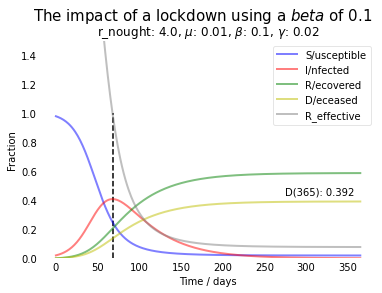

0.98 1 0.02 0 0
R_eff=1 at t= 34 d


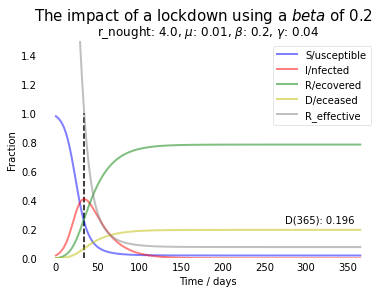

0.98 1 0.02 0 0
R_eff=1 at t= 23 d


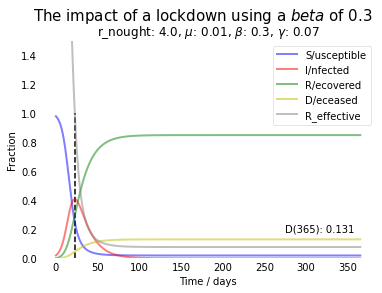

0.98 1 0.02 0 0
R_eff=1 at t= 17 d


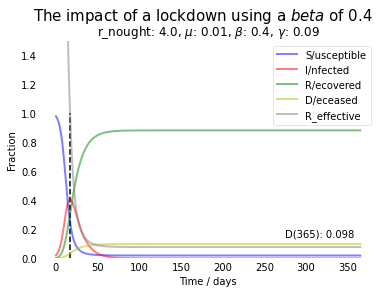

0.98 1 0.02 0 0
R_eff=1 at t= 14 d


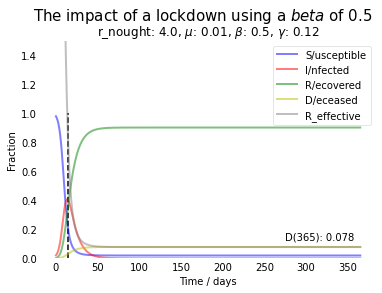

0.98 1 0.02 0 0
R_eff=1 at t= 12 d


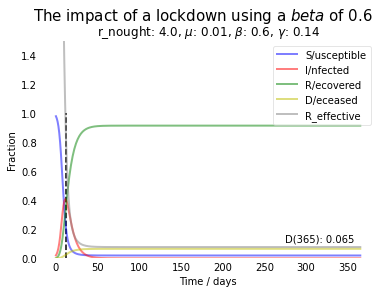

0.98 1 0.02 0 0
R_eff=1 at t= 10 d


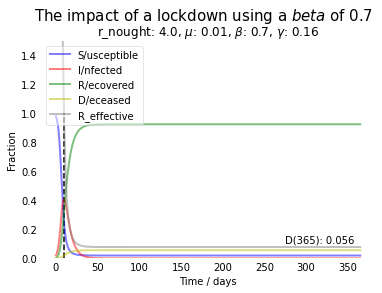

0.98 1 0.02 0 0
R_eff=1 at t= 9 d


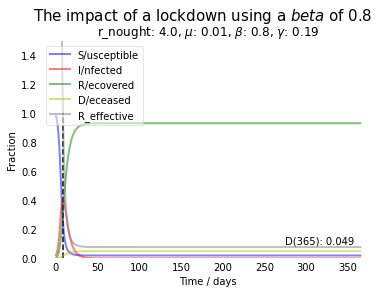

0.98 1 0.02 0 0
R_eff=1 at t= 8 d


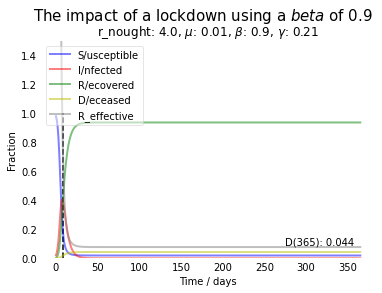

In [44]:
# Initialization
r_nought = 4.0
mu = 0.01
N = 1
I0 = N * 0.02
timeframe = 365
betas = list(range(1, 10, 1))
betas_list=[]
for x in betas:
    betas_list.append(x/10)

model_lockdown_1b(r_nought, mu, N, I0, timeframe, betas_list)

# Question 1 c) - Fixed gamma

In [42]:
def model_lockdown2(mu, N, I0, t, beta_hard, beta_soft, recovery_time):
    # Calculate gamma based on recovery time
    gamma = 1/recovery_time
    
    # Calculate r_noughts
    r_nought_hard = beta_hard / (gamma + mu)
    r_nought_soft = beta_soft / (gamma + mu)
    
    dict_beta_r_nought = {beta_hard: r_nought_hard, beta_soft: r_nought_soft}
    
    for key in dict_beta_r_nought:
        # Population size
        N = N

        # Initial conditions: 1 Infected, no Recovered individuals, no dead individuals
        I0, R0, D0 = I0, 0, 0 #case zero

        # All others, S=N-I-R susceptible, initially S0=N-I0-R0-D0
        S0 = N - I0 - R0 - D0 #normalization

        # Initial conditions vector
        y0 = S0, I0, R0, D0

        # A grid of time points (in days)
        t = np.linspace(0, timeframe, timeframe)
        
        
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N, key, gamma, mu))
        S, I, R, D = ret.T # return vector

        #find R_effective = 1 time
        t_1 = 0
        for time in range(0,len(S)):
            if dict_beta_r_nought[key]*S[time]/N < 1: 
                t_1 = time
                break
        print("R_eff=1 at t=", t_1, "d")

        # Calculate the fraction of the population which has died at t=365
        fraction_dead = D[-1]/N

        # Plot the data on three separate curves for S(t), I(t) and R(t)
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
        ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
        ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
        ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
        ax.plot(t, dict_beta_r_nought[key]*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
        ax.set_xlabel('Time / days')
        ax.set_ylabel('Fraction')
        ax.set_ylim(0,1.5)
        ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        ax.set_title(rf"r_nought: {round(dict_beta_r_nought[key], 2)}, $\mu$: {mu}, $\beta$: {round(key, 2)}, $\gamma$: {round(gamma, 2)}")
        plt.text(275, fraction_dead + 0.05, f"D(365): {round(fraction_dead, 3)}")
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.suptitle("The impact of a lockdown using a $beta$ of " +  str(key), fontsize = 15, y= 1)
        plt.show()

R_eff=1 at t= 36 d


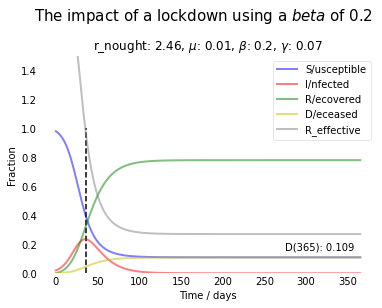

R_eff=1 at t= 9 d


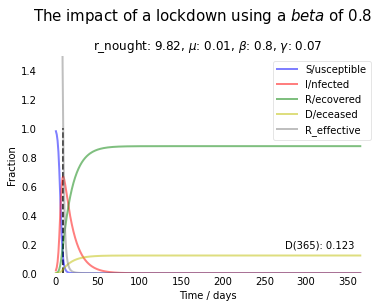

In [8]:
# Initialization
mu = 0.01
N = 1
I0 = N * 0.02
timeframe = 365
beta_hard = 0.2
beta_soft = 0.8
recovery_time = 14

model_lockdown2(mu, N, I0, timeframe, beta_hard, beta_soft, recovery_time)

# Question 1 c) - Fixed gamma - betas in list

In [40]:
def model_lockdown2b(mu, N, I0, t, betas, recovery_time):
    # Calculate gamma based on recovery time
    gamma = 1/recovery_time
    
    for beta in betas:
        # Calculate r_nought
        r_nought = beta / (gamma + mu)
        
        # Population size
        N = N

        # Initial conditions: 1 Infected, no Recovered individuals, no dead individuals
        I0, R0, D0 = I0, 0, 0 #case zero

        # All others, S=N-I-R susceptible, initially S0=N-I0-R0-D0
        S0 = N - I0 - R0 - D0 #normalization

        # Initial conditions vector
        y0 = S0, I0, R0, D0

        # A grid of time points (in days)
        t = np.linspace(0, timeframe, timeframe)
        
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
        S, I, R, D = ret.T # return vector

        #find R_effective = 1 time
        t_1 = 0
        for time in range(0,len(S)):
            if r_nought*S[time]/N < 1: 
                t_1 = time
                break
        print("R_eff=1 at t=", t_1, "d")

        # Calculate the fraction of the population which has died at t=365
        fraction_dead = D[-1]/N

        # Plot the data on three separate curves for S(t), I(t) and R(t)
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
        ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
        ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
        ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
        ax.plot(t, r_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
        ax.set_xlabel('Time / days')
        ax.set_ylabel('Fraction')
        ax.set_ylim(0,1.5)
        ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        ax.set_title(rf"r_nought: {round(r_nought, 2)}, $\mu$: {mu}, $\beta$: {round(beta, 2)}, $\gamma$: {round(gamma, 2)}")
        plt.text(275, fraction_dead + 0.05, f"D(365): {round(fraction_dead, 3)}")
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.suptitle("The impact of a lockdown using a $beta$ of " +  str(beta), fontsize = 15, y= 1)
        plt.savefig('Analysis_Lockdown_fixed_gamma' + str(beta) + '.png', dpi = 100)
        plt.show()

R_eff=1 at t= 64 d


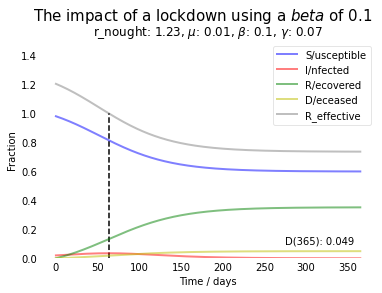

R_eff=1 at t= 36 d


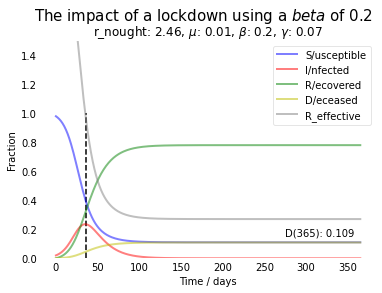

R_eff=1 at t= 23 d


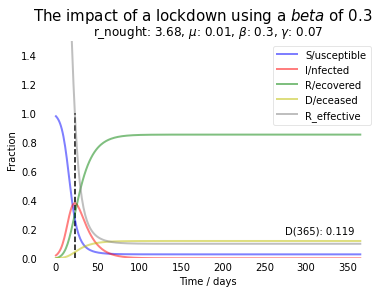

R_eff=1 at t= 17 d


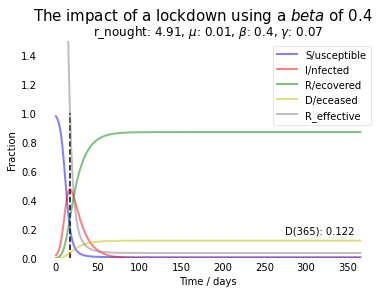

R_eff=1 at t= 14 d


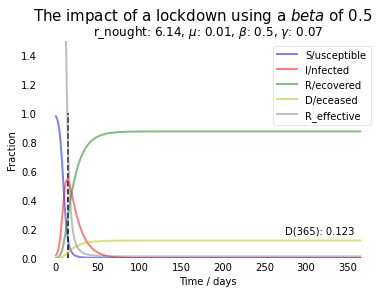

R_eff=1 at t= 12 d


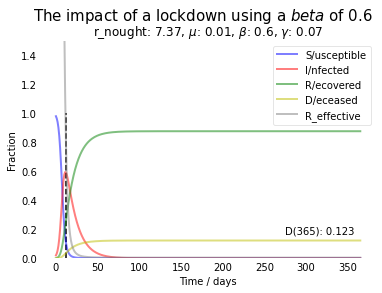

R_eff=1 at t= 10 d


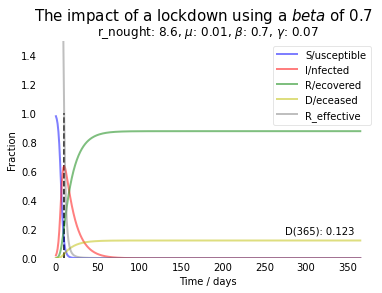

R_eff=1 at t= 9 d


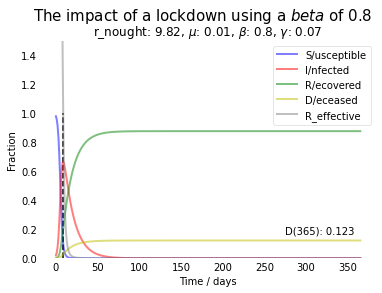

R_eff=1 at t= 8 d


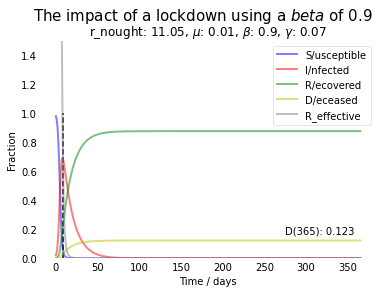

In [41]:
# Initialization
mu = 0.01
N = 1
I0 = N * 0.02
timeframe = 365
betas = list(range(1, 10, 1))
betas_list=[]
for x in betas:
    betas_list.append(x/10)
recovery_time = 14

model_lockdown2b(mu, N, I0, timeframe, betas_list, recovery_time)